In [ ]:
#анализ распределения количества документов по новостям

In [1]:
!pip install pandas
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import pandas as pd 
import numpy as np
import csv
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

In [4]:
#tsv -> csv
tsv_file='/home/toloka.tsv'
csv_table=pd.read_table(tsv_file,sep='\t')
csv_table.to_csv('/home/toloka_new.csv', sep=',', index=False, encoding='utf-8-sig')

In [5]:
with open('/home/toloka_new.csv', 'r') as f:
  task_suite_col = [2, 3, 13]
  new_csv = []                              
  reader = csv.reader(f, delimiter=",")
  for row in reader:
    col = list(row[i] for i in task_suite_col)                          
    new_csv.append(col)                   

with open('/home/toloka_statistics.csv', 'w') as f:            
  writer = csv.writer(f, delimiter=";")
  writer.writerows(new_csv)

In [6]:
df = pd.read_csv('/home/toloka_statistics.csv', sep = ';')
df

,OUTPUT:pole,OUTPUT:doc_id,ASSIGNMENT:task_suite_id
0,other_topic,1020.0,00000ff767--61ae5a9c3f9df01ff0b583d1
1,pole_1,1019.0,00000ff767--61ae5a9c3f9df01ff0b583d1
2,pole_2,1018.0,00000ff767--61ae5a9c3f9df01ff0b583d1
3,pole_1,1017.0,00000ff767--61ae5a9c3f9df01ff0b583d1
4,pole_2,1016.0,00000ff767--61ae5a9c3f9df01ff0b583d1
...,...,...,...
1441,pole_0,9116.0,00000ff767--61ae5a9c3f9df01ff0b583cc
1442,pole_1,9115.0,00000ff767--61ae5a9c3f9df01ff0b583cc
1443,pole_0,9114.0,00000ff767--61ae5a9c3f9df01ff0b583cc
1444,pole_0,9112.0,00000ff767--61ae5a9c3f9df01ff0b583cc


In [7]:
df.rename(columns={'OUTPUT:pole': 'pole', 'OUTPUT:doc_id': 'doc_id', 'ASSIGNMENT:task_suite_id': 'task_suite_id'}, inplace=True)
df = df.dropna()
df

,pole,doc_id,task_suite_id
0,other_topic,1020.0,00000ff767--61ae5a9c3f9df01ff0b583d1
1,pole_1,1019.0,00000ff767--61ae5a9c3f9df01ff0b583d1
2,pole_2,1018.0,00000ff767--61ae5a9c3f9df01ff0b583d1
3,pole_1,1017.0,00000ff767--61ae5a9c3f9df01ff0b583d1
4,pole_2,1016.0,00000ff767--61ae5a9c3f9df01ff0b583d1
...,...,...,...
1440,pole_1,9120.0,00000ff767--61ae5a9c3f9df01ff0b583cc
1441,pole_0,9116.0,00000ff767--61ae5a9c3f9df01ff0b583cc
1442,pole_1,9115.0,00000ff767--61ae5a9c3f9df01ff0b583cc
1443,pole_0,9114.0,00000ff767--61ae5a9c3f9df01ff0b583cc


In [8]:
df = df.reset_index()
df

,index,pole,doc_id,task_suite_id
0,0,other_topic,1020.0,00000ff767--61ae5a9c3f9df01ff0b583d1
1,1,pole_1,1019.0,00000ff767--61ae5a9c3f9df01ff0b583d1
2,2,pole_2,1018.0,00000ff767--61ae5a9c3f9df01ff0b583d1
3,3,pole_1,1017.0,00000ff767--61ae5a9c3f9df01ff0b583d1
4,4,pole_2,1016.0,00000ff767--61ae5a9c3f9df01ff0b583d1
...,...,...,...,...
1307,1440,pole_1,9120.0,00000ff767--61ae5a9c3f9df01ff0b583cc
1308,1441,pole_0,9116.0,00000ff767--61ae5a9c3f9df01ff0b583cc
1309,1442,pole_1,9115.0,00000ff767--61ae5a9c3f9df01ff0b583cc
1310,1443,pole_0,9114.0,00000ff767--61ae5a9c3f9df01ff0b583cc


In [9]:
with open('/home/graph_toloka.xlsx', 'wb') as f:
  df.to_excel(f)

In [ ]:
#кол-во поляризованных, нейтральных, фона в каждом корпусе
#90 графиков, тк 90 заданий на толоке, перекрытие = 3

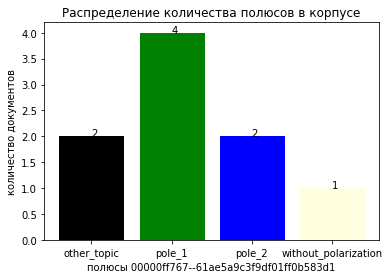

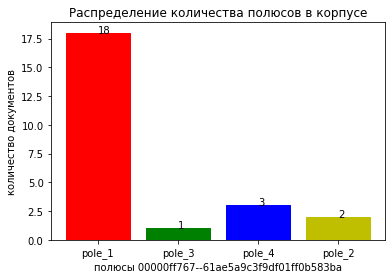

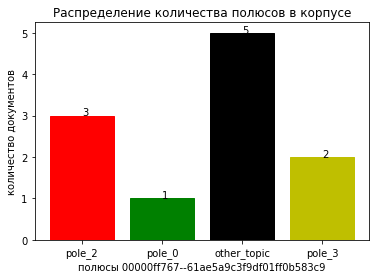

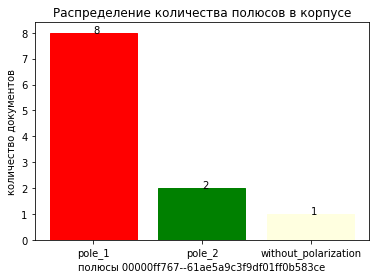

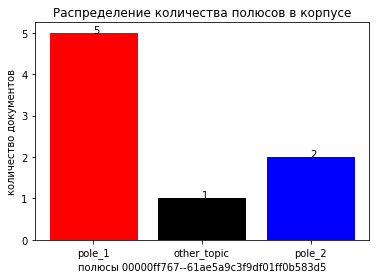

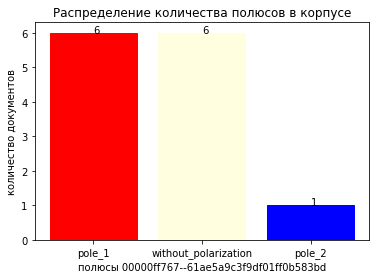

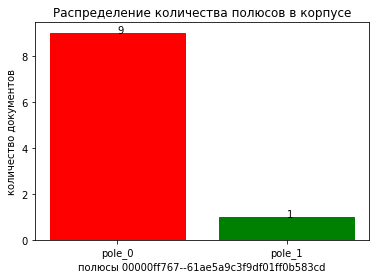

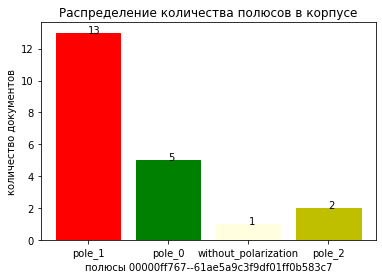

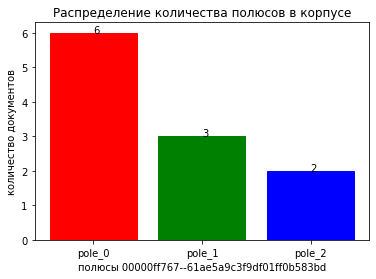

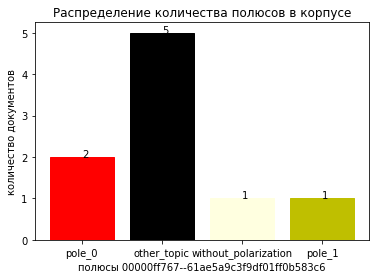

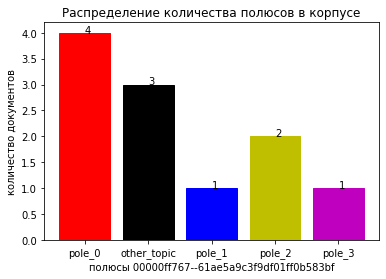

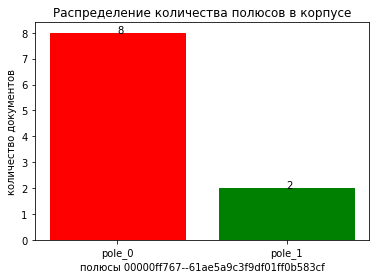

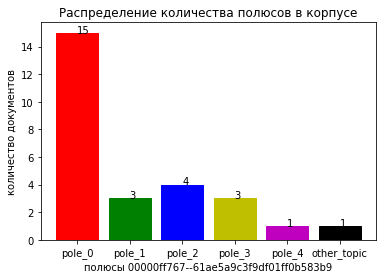

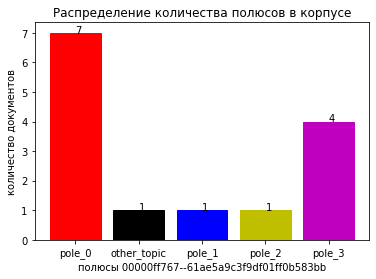

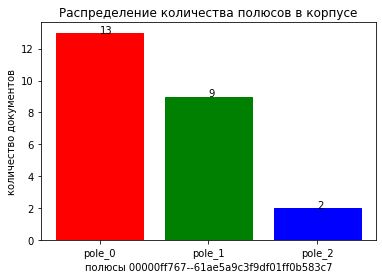

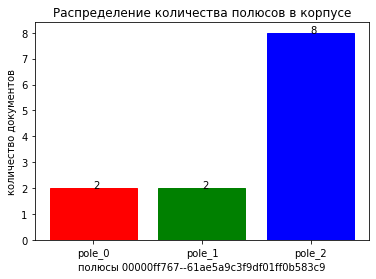

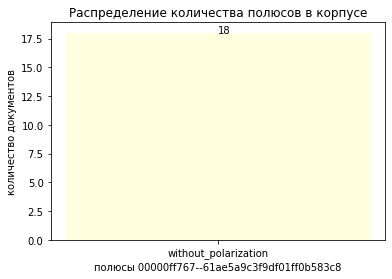

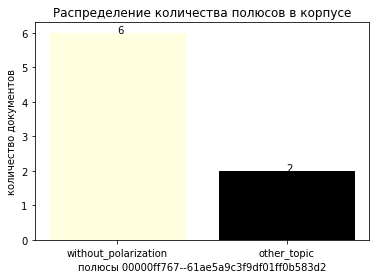

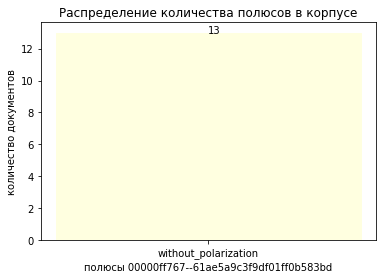

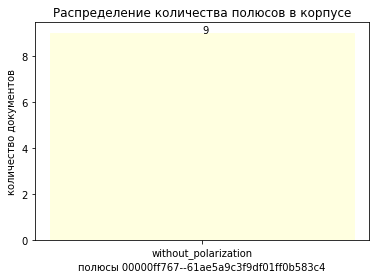

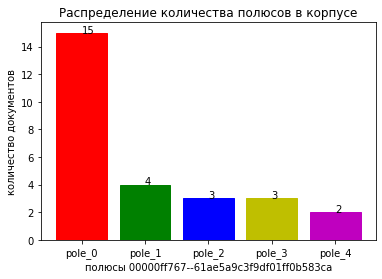

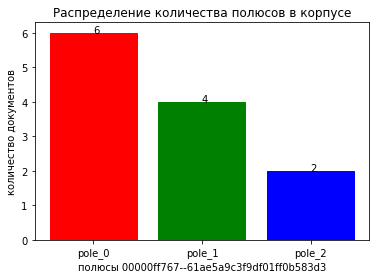

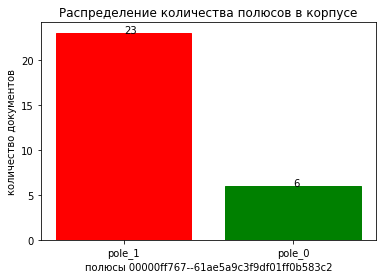

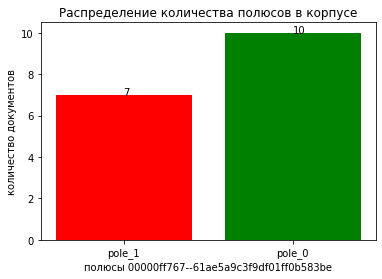

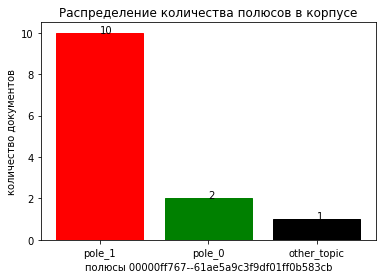

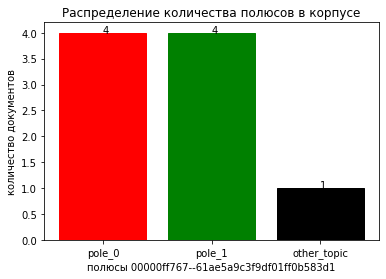

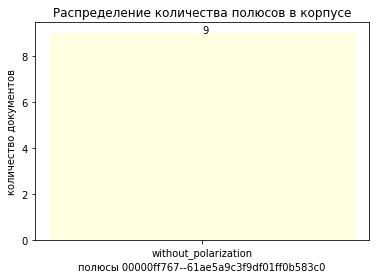

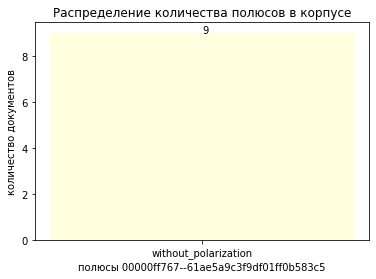

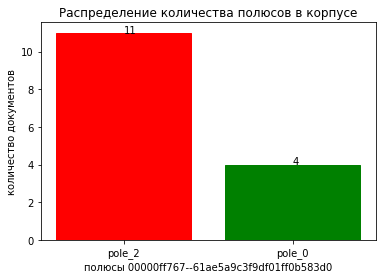

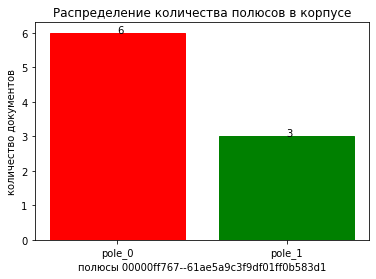

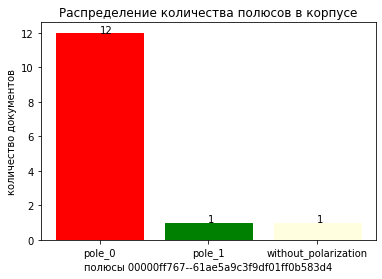

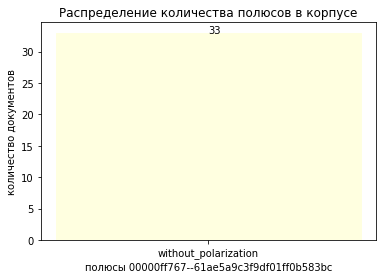

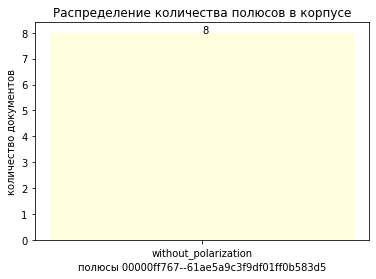

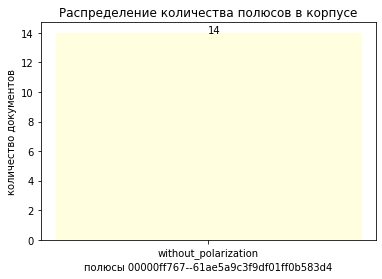

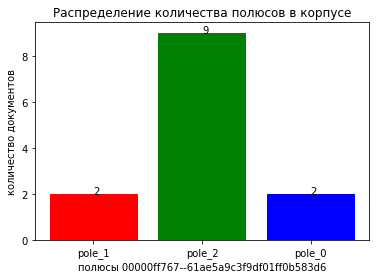

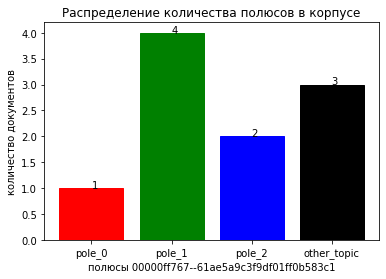

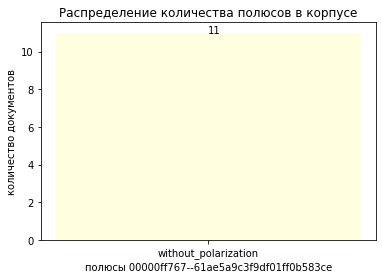

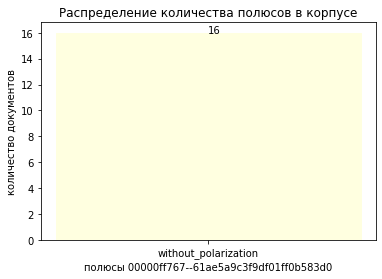

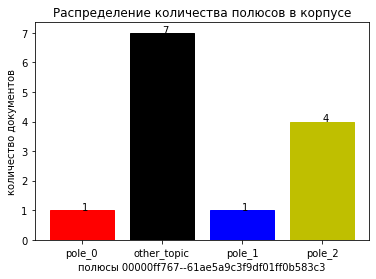

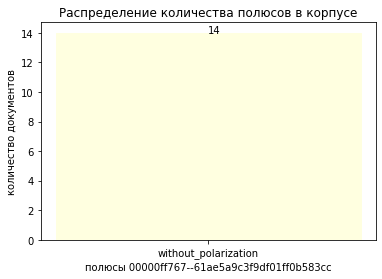

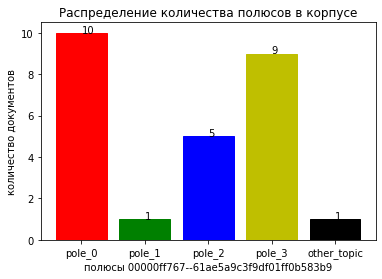

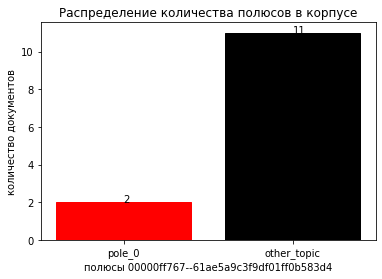

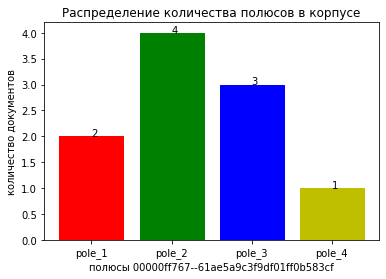

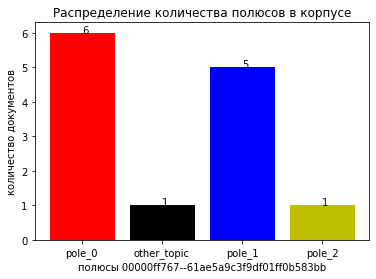

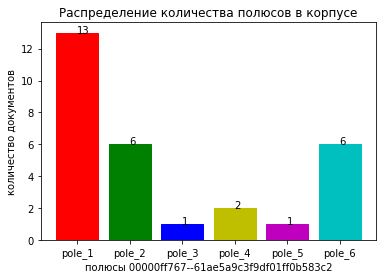

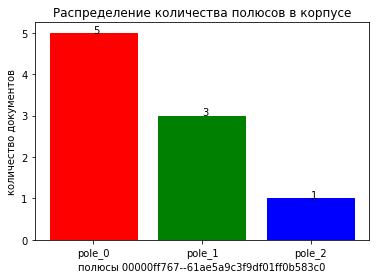

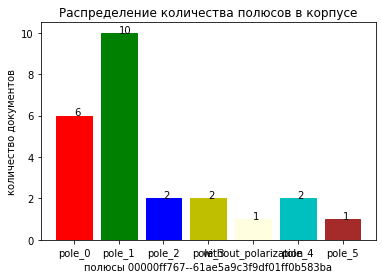

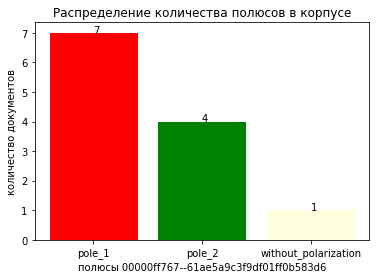

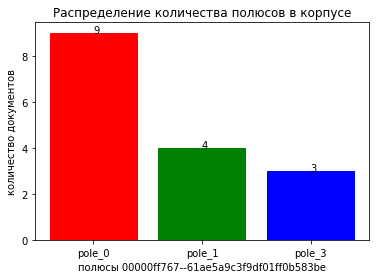

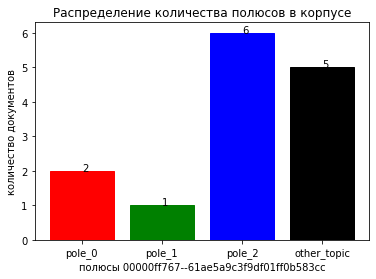

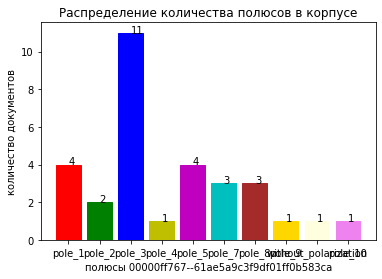

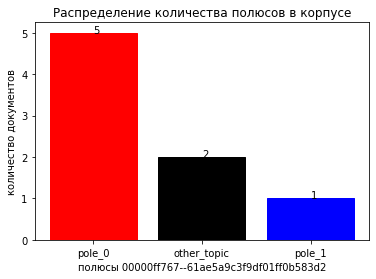

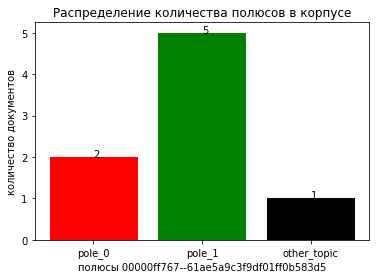

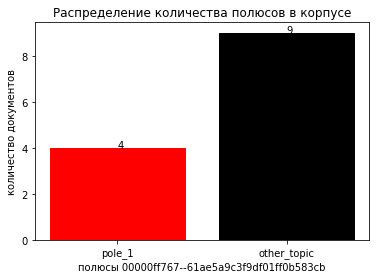

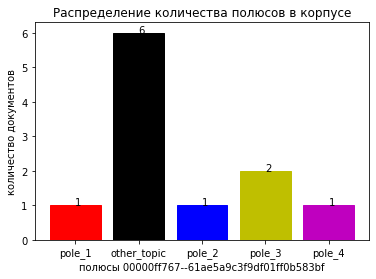

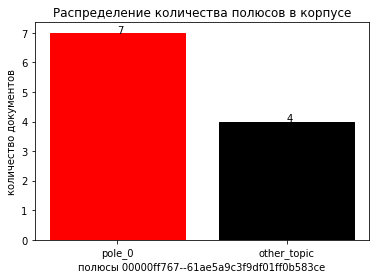

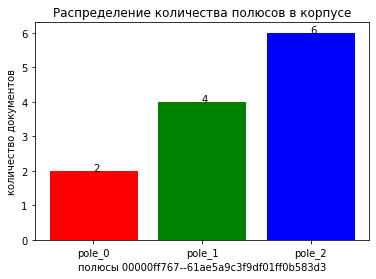

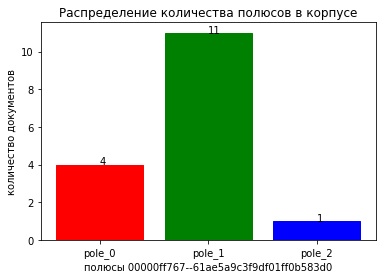

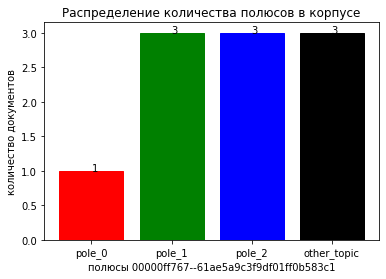

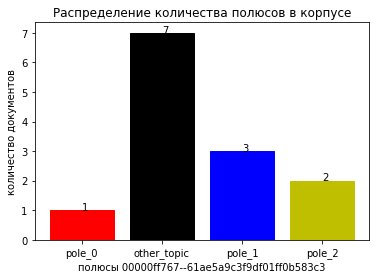

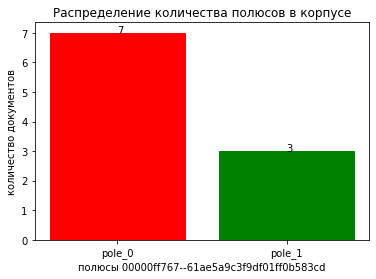

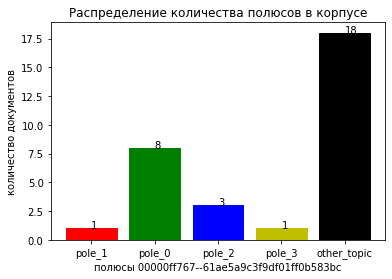

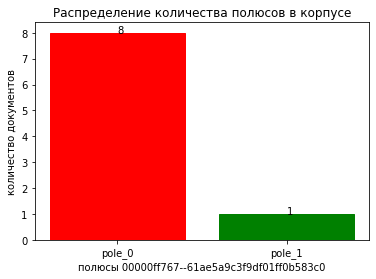

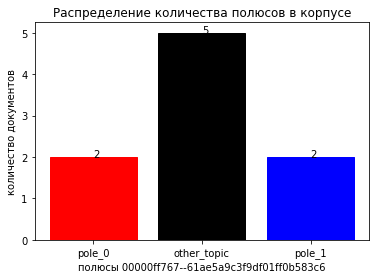

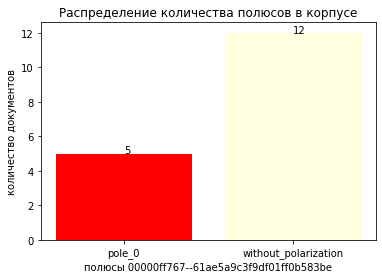

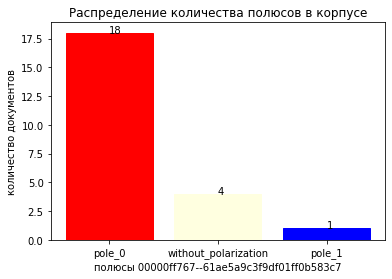

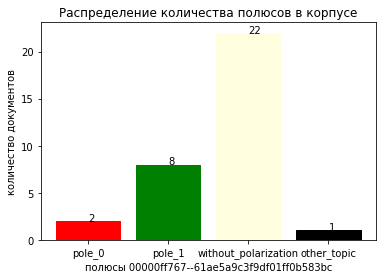

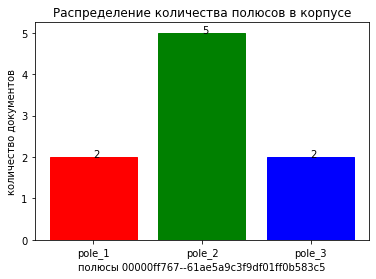

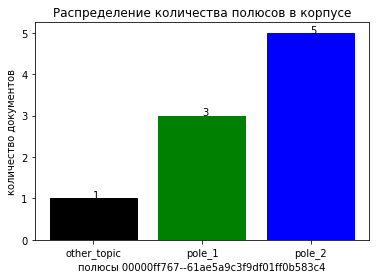

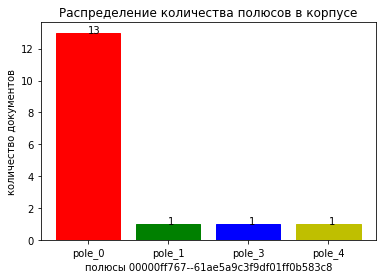

In [23]:
pole_names = []
pole_values = []
poles_kol = 0
docs_pole_kol = 0
other_topic_kol = 0
without_topic_kol = 0

curr_id = df.iloc[0]['task_suite_id']
curr_pole = df.iloc[0]['pole']
#print(curr_id)

for i in range(0,1034):
  if curr_id == df.iloc[i]['task_suite_id']:
    if curr_pole == df.iloc[i]['pole']:
      docs_pole_kol += 1
    elif curr_pole != df.iloc[i]['pole']:
      if curr_pole in pole_names:
         for j in range(0, len(pole_names)):
           if str(pole_names[j]) == str(curr_pole):
             pole_values[j] += docs_pole_kol 
             #print(pole_values)
         docs_pole_kol = 1
         curr_pole = df.iloc[i]['pole']
      else:
         pole_names.insert(poles_kol, curr_pole)
         pole_values.insert(poles_kol, docs_pole_kol)
         #print('Step ' + str(i) + ': Added ' + str(curr_pole))
         #print(pole_names)
         #print(pole_values)
         curr_pole = df.iloc[i]['pole']
         poles_kol += 1
         docs_pole_kol = 1

    #print('Step ' + str(i) + ': curr_pole= ' + str(curr_pole))
  else:
    if curr_pole in pole_names:
      for j in range(0, len(pole_names)):
        if str(pole_names[j]) == str(curr_pole):
          pole_values[j] += docs_pole_kol 
          #print(pole_values)
    else:
      pole_names.insert(poles_kol, curr_pole)
      pole_values.insert(poles_kol, docs_pole_kol)
      #print('Step ' + str(i) + ': Added ' + str(curr_pole))

    plt.title('Распределение количества полюсов в корпусе')
    plt.xlabel('полюсы ' + curr_id)
    plt.ylabel('количество документов')
    #sns.barplot(y=pole_names, x=pole_values)
    barlist = plt.bar(pole_names, pole_values)

    if 'other_topic' in pole_names:
      barlist[pole_names.index('other_topic')].set_color('k')
    if 'without_polarization' in pole_names:
      barlist[pole_names.index('without_polarization')].set_color('lightyellow')
    for j in range(0,len(pole_names)):
      if pole_names[j] != 'other_topic' and pole_names[j] != 'without_polarization':
        colors = ['r','g','b','y','m','c','brown','gold','azure','violet','cyan']
        barlist[j].set_color(colors[j])
    #print(len(pole_names))
    #print(pole_names)
    #print(pole_values)
    addlabels(pole_names, pole_values)
    plt.show()

    #print('Step' + str(i) + '------')
    curr_id = df.iloc[i]['task_suite_id']
    curr_pole = df.iloc[i]['pole']
    pole_names = []
    pole_values = []
    poles_kol = 0
    docs_pole_kol = 1
    other_topic_kol = 0
    without_topic_kol = 0

    #break

In [40]:
#print(np.isnan(df.iloc[9]['pole']))


True


In [ ]:
#построение общего графика - распределение количества документов по корпусам

In [24]:
df_all = pd.read_csv('/home/toloka_statistics.csv', sep = ';')
df_all

,OUTPUT:pole,OUTPUT:doc_id,ASSIGNMENT:task_suite_id
0,other_topic,1020.0,00000ff767--61ae5a9c3f9df01ff0b583d1
1,pole_1,1019.0,00000ff767--61ae5a9c3f9df01ff0b583d1
2,pole_2,1018.0,00000ff767--61ae5a9c3f9df01ff0b583d1
3,pole_1,1017.0,00000ff767--61ae5a9c3f9df01ff0b583d1
4,pole_2,1016.0,00000ff767--61ae5a9c3f9df01ff0b583d1
...,...,...,...
1441,pole_0,9116.0,00000ff767--61ae5a9c3f9df01ff0b583cc
1442,pole_1,9115.0,00000ff767--61ae5a9c3f9df01ff0b583cc
1443,pole_0,9114.0,00000ff767--61ae5a9c3f9df01ff0b583cc
1444,pole_0,9112.0,00000ff767--61ae5a9c3f9df01ff0b583cc


In [25]:
df_all.rename(columns={'OUTPUT:pole': 'pole', 'OUTPUT:doc_id': 'doc_id', 'ASSIGNMENT:task_suite_id': 'task_suite_id'}, inplace=True)
df_all.pop('pole')
df_all = df_all.drop_duplicates()
df_all = df_all.dropna()
df_all

,doc_id,task_suite_id
0,1020.0,00000ff767--61ae5a9c3f9df01ff0b583d1
1,1019.0,00000ff767--61ae5a9c3f9df01ff0b583d1
2,1018.0,00000ff767--61ae5a9c3f9df01ff0b583d1
3,1017.0,00000ff767--61ae5a9c3f9df01ff0b583d1
4,1016.0,00000ff767--61ae5a9c3f9df01ff0b583d1
...,...,...
615,9120.0,00000ff767--61ae5a9c3f9df01ff0b583cc
616,9116.0,00000ff767--61ae5a9c3f9df01ff0b583cc
617,9115.0,00000ff767--61ae5a9c3f9df01ff0b583cc
618,9114.0,00000ff767--61ae5a9c3f9df01ff0b583cc


In [26]:
df_all = df_all.reset_index()
df_all

,index,doc_id,task_suite_id
0,0,1020.0,00000ff767--61ae5a9c3f9df01ff0b583d1
1,1,1019.0,00000ff767--61ae5a9c3f9df01ff0b583d1
2,2,1018.0,00000ff767--61ae5a9c3f9df01ff0b583d1
3,3,1017.0,00000ff767--61ae5a9c3f9df01ff0b583d1
4,4,1016.0,00000ff767--61ae5a9c3f9df01ff0b583d1
...,...,...,...
447,615,9120.0,00000ff767--61ae5a9c3f9df01ff0b583cc
448,616,9116.0,00000ff767--61ae5a9c3f9df01ff0b583cc
449,617,9115.0,00000ff767--61ae5a9c3f9df01ff0b583cc
450,618,9114.0,00000ff767--61ae5a9c3f9df01ff0b583cc


In [27]:
df_all = df_all.groupby('task_suite_id').size().reset_index()
df_all

,task_suite_id,0
0,00000ff767--61ae5a9c3f9df01ff0b583b9,27
1,00000ff767--61ae5a9c3f9df01ff0b583ba,24
2,00000ff767--61ae5a9c3f9df01ff0b583bb,14
3,00000ff767--61ae5a9c3f9df01ff0b583bc,33
4,00000ff767--61ae5a9c3f9df01ff0b583bd,13
5,00000ff767--61ae5a9c3f9df01ff0b583be,17
6,00000ff767--61ae5a9c3f9df01ff0b583bf,11
7,00000ff767--61ae5a9c3f9df01ff0b583c0,9
8,00000ff767--61ae5a9c3f9df01ff0b583c1,10
9,00000ff767--61ae5a9c3f9df01ff0b583c2,29


In [28]:
df_all.columns = ['task_suite_id', 'docs_amount']
df_all.insert(0, 'id', list(range(0,df_all.shape[0])))
df_all

,id,task_suite_id,docs_amount
0,0,00000ff767--61ae5a9c3f9df01ff0b583b9,27
1,1,00000ff767--61ae5a9c3f9df01ff0b583ba,24
2,2,00000ff767--61ae5a9c3f9df01ff0b583bb,14
3,3,00000ff767--61ae5a9c3f9df01ff0b583bc,33
4,4,00000ff767--61ae5a9c3f9df01ff0b583bd,13
5,5,00000ff767--61ae5a9c3f9df01ff0b583be,17
6,6,00000ff767--61ae5a9c3f9df01ff0b583bf,11
7,7,00000ff767--61ae5a9c3f9df01ff0b583c0,9
8,8,00000ff767--61ae5a9c3f9df01ff0b583c1,10
9,9,00000ff767--61ae5a9c3f9df01ff0b583c2,29


In [29]:
!rm -rf '/home/toloka_new.csv'
!rm -rf '/home/toloka_statistics.csv'

In [30]:
with open('/home/data_statistics.csv', 'w') as f:
  df_all.to_csv(f, sep=',')

In [31]:
#with open('/home/data_statistics_excel.xlsx', 'wb') as f:
#  df.to_excel(f)

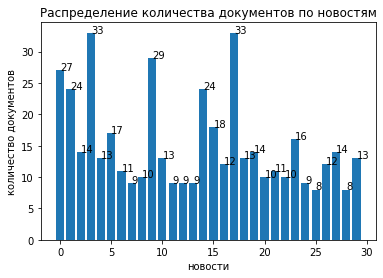

In [32]:
plt.title('Распределение количества документов по новостям')
plt.xlabel('новости')
plt.ylabel('количество документов')
plt.bar(df_all['id'], df_all['docs_amount'])

addlabels(df_all['id'], df_all['docs_amount'])
plt.show()
